# A Glance into Steam's Gaming Community

**The Background:**  The data contains information gathered from Steam about player's gaming habbits. Wikipedia describes Steam as the largest digital distribution playform for PC gaming and continues by pointing our that by 2019 there were over a billion registered accounts with **90 million** monthly active users. 

WePC helps to put these numbers in perspective by estimating that the video games market is expected to be worth over **90 Billion USD** by 2020, up from the 78.61 Billion USD value in 2017. 

When we take a look at these basic numbers two things become clear; there is plenty of interest and plenty of money in this space. For many gamers who have grown up spending weekends playing games until sunrise everything makes pretty intuitive sense, we know where potential is. A gamer might be able to tell you pretty quickly whether to bet on the next title from EA or the one from CD Project Red. However, for my parents and many others who have never held a controller for longer than 10 minutes at a time, it can be helpful to establish a foundation off of which to start their research. 

To build a foundation its important to understand a few basic things. Which games people do or don't like, how much time people spend on games, and where that time is spent. If gamers spend **50,000 hours** playing a game does that mean the game is a success? Looking at the habbits of gamers will help us put this number in perspective. 


[WePC] https://www.wepc.com/news/video-game-statistics/

[Wiki] https://en.wikipedia.org/wiki/Steam_(software)


**The Data Set:** 
    
The data used in this analysis comes from Kaggle. This data set includes information about over 3,000 of the most popular games. At the time that this data was collected there were over 6,000 games on steam, however not all of them were played very frequently...or at all. 

The data includes information about which games were purchased by users and how much time users spent playing these games by each user.

It is important to note that this data was last updated 2 years ago, so the top games most certainly have changed, and its likely that our player have put in significant play time since then. Glancing back at the Steam wikipedia page we can see that in 2013 Steam already had a 75% share of the PC gaming market. Our data being 2 years old, still gives us an important intuitive understanding of the scales involved in this market. Below we will try to answer three basic questions about this dataset to help try to build a contextual framework for the video game industry.

**Spoiler:** If you choose to pursue further research in the field you'll be able to see that even the world's most played game can be de-throned in a matter of months by the most unexpected of games. **End Spoiler**





[Kaggle] https://www.kaggle.com/tamber/steam-video-games/version/3



**The Questions**
    1. Which games have gamers spent the most time playing? 
    2. How do the distributions of time played of the most popular games compare? 
    3. Which games do the most dedicated gamers like to play?  
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind as ttest
%matplotlib inline

In [2]:
#importing our dataset 
file = 'steam-200k.csv'
df = pd.read_csv(file)
#print(df.head())

**Cleaning Up:** Our data was provided in a relatively difficult form. In order to start analyzing we will start by doing some basic clean up to make this data easier to work with. 
    1. We need to name our columns with the names that were provided in the Kaggle description.
    2. We have an extra column that was not described, we need to see if there is any valuable info or whether we should drop this column. 
    3. We need to gather the data that reflects time played and restructure it to make it easier to work with. 


In [3]:
#rename our columns and peak at the format
df.columns = ['User ID', 'Game Title', 'Behavior Name', 'Value', 'Unknown']
print(df.head())

     User ID                  Game Title Behavior Name  Value  Unknown
0  151603712  The Elder Scrolls V Skyrim          play  273.0        0
1  151603712                   Fallout 4      purchase    1.0        0
2  151603712                   Fallout 4          play   87.0        0
3  151603712                       Spore      purchase    1.0        0
4  151603712                       Spore          play   14.9        0


In [4]:
#Lets check if the Unknown column is important
print('Length of Unknown Column: '+str(len(df['Unknown'])))
unique = df['Unknown'].value_counts()
print(unique)
print('There is...zero..useful info here. Lets drop this column.')
df = df.drop(columns=['Unknown'])

Length of Unknown Column: 199999
0    199999
Name: Unknown, dtype: int64
There is...zero..useful info here. Lets drop this column.


Below we remove all games that were played for less than 1 hour and we are adding a column that accounts for the cumulative total time played for each game by all users. We also want to start describing and exploring this data through descriptive statistics. 

In [5]:
#Considering only time played
played_df = df[df['Behavior Name']=='play']
print('original df size: '+str(played_df.shape))

#removing all games that were played for less than 1 hour 
played_df = played_df[played_df.Value > 1]
print('df size 1h+: '+str(played_df.shape))

#reorganizing data to show time played by each user per game 
played_pivot = played_df.pivot_table(index='Game Title', columns='User ID', values='Value')

#calculating total time played by users for each game
played_pivot['Total'] = played_pivot.sum(axis=1)

#descriptive statistics for total time played
print(played_pivot['Total'].describe())

#What is the total time played across all games? 
total_played_time = played_pivot['Total'].sum()
print('Total time played across all games: ' +str(total_played_time))


original df size: (70489, 4)
df size 1h+: (52639, 4)
count      3049.000000
mean       1127.203591
std       19468.501250
min           1.100000
25%           5.800000
50%          22.400000
75%         138.600000
max      981133.300000
Name: Total, dtype: float64
Total time played across all games: 3436843.75


We can see above simply that **most** games are not very good. We draw this conclusion by looking at our percentiles and our max value. It looks like 75% of games don't even have 138 hours played across the entire playerbase in our dataset. 

**This tells us that if you were to blindly select a game to bet on, there is at least a 75% chance that the game would fail.**

We can see however that one game is absolutely **crushing** the competition, with nearly 1 million hours played. This is the kind of winner that might be worth knowing about. We can do some quick math to see that 981133 hours is approximately equivalent to **112 years.** That is over a life-time of dedication provided by our players. Maybe there is something special about this one..

Not all games can be this successful, but which games have our players put at least 100,000 hours (11.41 years) into? 


In [6]:
#which games have our gamers put over 100,000 hours into? 
played_pivot.loc[lambda df: played_pivot['Total'] > 100000, 'Total']

Game Title
Counter-Strike                     134205.1
Counter-Strike Global Offensive    322736.3
Dota 2                             981133.3
Team Fortress 2                    173356.8
Name: Total, dtype: float64

Only four games made the cut, but we can reorganize our data to see what the most popular games on Steam were when this data was captured. We can see that Dota 2 is keeping the throne warm during this time. 

In [7]:
#sorting our games by total time played
played_ranked = played_pivot.sort_values(by='Total', ascending=False)
#played_ranked.head()

c:\python\python37\lib\site-packages\pandas\core\indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


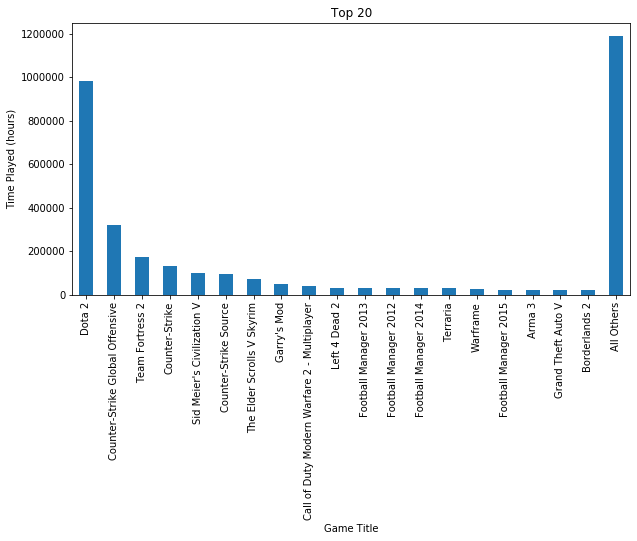

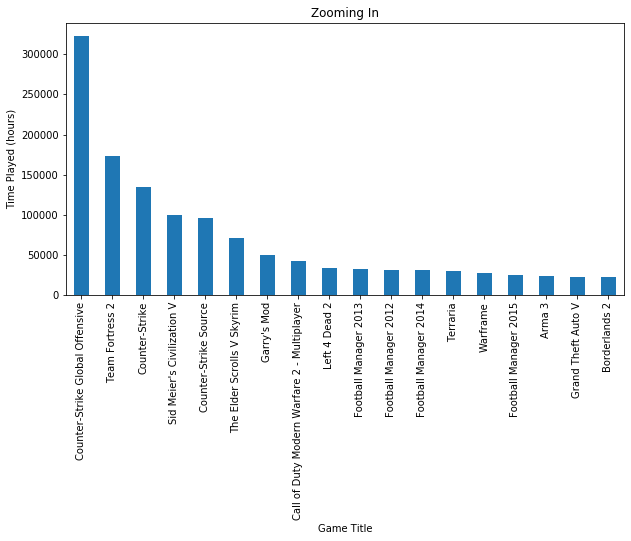

In [8]:
#ranking our top 20 games
most_played = played_ranked[:19]
others = int(played_ranked.Total[19:].sum())

#combining the time played of the games that didn't make the cut. 
most_played.loc[20] = others
most_played = most_played.rename(index={20: 'All Others'})


#visualizing our most popular games
plt.figure(figsize=(10, 5))
most_played['Total'].plot.bar()
plt.title('Top 20')
plt.ylabel('Time Played (hours)')
plt.show()

#zooming in to exclude Dota and All others
plt.figure(figsize=(10, 5))
zoom = most_played[1:19]
zoom['Total'].plot.bar()
plt.title('Zooming In')
plt.ylabel('Time Played (hours)')
plt.show()



We can see that the majority of gamers spend their time playing a select group of games. In fact the top game, Dota 2, has nearly as many hours played as the cumulative total of the remaining games that did not make the list. This is why researching a particular game and learning what makes that game valuable or fun for gamers is critical to predicting which games will be successful. 

An easy metric to judge a video game developer by is their past. We can see that the **Counter Strike** series makes three appearances on this list, holding down the second, fourth and sixth spots. We note that the **Football Manager** series also makes multiple appearances on our list.

It is often useful to look a layer deeper, if we were to consider which games were made by publisher we would learn that the **Valve Corporation** developed not only Counter Strike, but also titles like Team Fortress 2 and Left 4 Dead 2. Unfortunately publisher data was not included in our dataset and will not be discussed in depth here, but it always helps to learn who is behind the most successful of games.  

Now that we've taken look at the most successful games, we ask, is it really that special for a game to have over 100,000 hours of time played? 

First, we'll tighten our standards by dropping all the games that have less than **8,760 hours** of total game time played by their players. Why 8,760? Well, because we've already seen that popular games can pull in over a **century** worth of play time. So do we really care about the games that can't keep gamers' attention for **1 year** (8,760 hours)? Maybe we do, but not for this analysis, here we are most interested in the most successful games. 


Originally we were considering 3049 games
When we set our standard to 1 year of play time we have 45 games that made the cut.


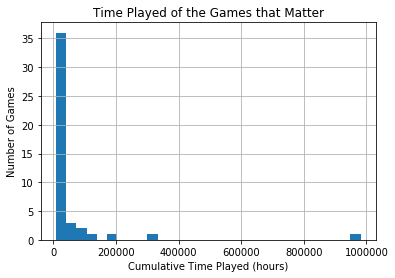

In [9]:
#Removing games with less than 8760 cumulative hours played
print('Originally we were considering ' + str(len(played_ranked)) + ' games')
worth_playing = played_ranked[played_ranked['Total'] > 8760]
print('When we set our standard to 1 year of play time we have ' 
      + str(len(worth_playing)) + ' games that made the cut.')

#Making a histogram 
worth_playing['Total'].hist(bins=30)
plt.title('Time Played of the Games that Matter')
plt.ylabel('Number of Games')
plt.xlabel('Cumulative Time Played (hours)')
plt.show()


Making a quick histogram shows us that this market is much more approachable than at first glance. Using these standards we can quickly narrow our focus from the 6,000 games on Steam to the 45 that players put a significant amount of time into. From there we can see that even of our 45 games, the majority are not played nearly as much as the most popular of games. 

What makes these games special is difficult to quantify, but can we see if the most popular games have anything in common? Are the players who play these games spending their time the same way? Are these values being inflated by a lot of players that only play a bit or by dedicated fans who play non-stop? Which fans are the most dedicated? 

We can start to gain insight into these questions by taking a peak at the histogram for our top game: Dota 2. We can also plot some of the runners up for comparison.

Before do this we need to further transform our data and add a new limiting metric. Here, to prevent skewing our data we want to exclude people two groups of people: those who are still learning the game or just tried the game our and decided it wasn't for them, and those who make fake account for nefarious or  other reasons.

**Side note:** In gaming professional players sometimes make a second account to be matched up with players who are significantly worse than they are at the game so that they can dominate unsuspecting players...usually for YouTube videos like the one below. 

[Overwatch Curios] https://www.youtube.com/watch?v=q-vJdfwmfXA

We will select 40 hours as our threshold. If we're looking at a games that people have cumulatively put 10-100+ years into it seems reasonable that those who have put less than a full work week into the game simply aren't pulling their weight. 


In [10]:
#dropping the 'Total' column so that we use the data for a proper histogram
dropped_total = played_ranked.drop(columns='Total')

#Transforming the data to make it easier to work with 
#we are not considering regular Counter-Strike because CSGO is already on the list
dota_time = dropped_total.loc['Dota 2'].T
csgo_time = dropped_total.loc['Counter-Strike Global Offensive'].T
tf2_time = dropped_total.loc['Team Fortress 2'].T
civ5_time = dropped_total.loc['Sid Meier\'s Civilization V'].T

#turning our series to a dataframe
dota_time = dota_time.to_frame()
csgo_time = csgo_time.to_frame()
tf2_time = tf2_time.to_frame()
civ5_time = civ5_time.to_frame()

#naming our play time column
dota_time.columns = ['Hours Played DOTA 2']
csgo_time.columns = ['Hours Played CS:GO']
tf2_time.columns = ['Hours Played TF2']
civ5_time.columns = ['Hours Played Civ 5']

#exlcuding gamers with less than 40 hours played
drop_noobs_dota = dota_time[dota_time['Hours Played DOTA 2'] > 40]
drop_noobs_csgo = csgo_time[csgo_time['Hours Played CS:GO'] > 40]
drop_noobs_tf2 = tf2_time[tf2_time['Hours Played TF2'] > 40]
drop_noobs_civ5 = civ5_time[civ5_time['Hours Played Civ 5'] > 40]


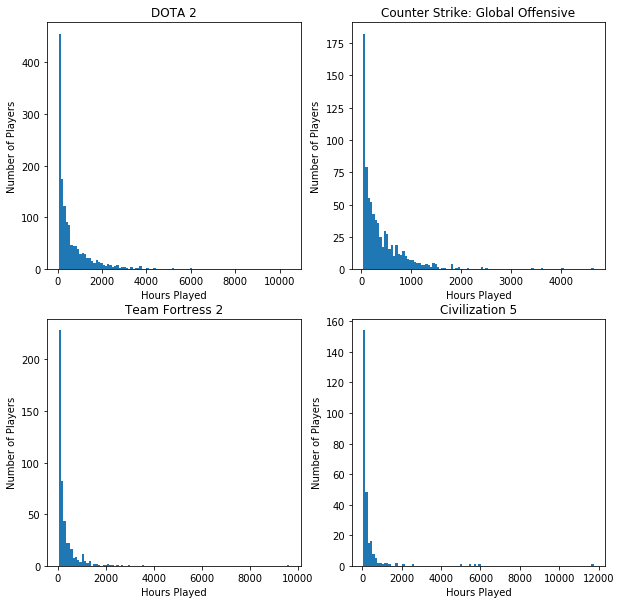

In [28]:
#Plotting our figure
plt.figure(figsize=(10,10))

#Dota 2 Histogram
plt.subplot(2, 2, 1)
plt.hist(drop_noobs_dota['Hours Played DOTA 2'], bins=100)
plt.title('DOTA 2')
plt.ylabel('Number of Players')
plt.xlabel('Hours Played')

#CS:GO Histogram
plt.subplot(2, 2, 2)
plt.hist(drop_noobs_csgo['Hours Played CS:GO'], bins=100)
plt.title('Counter Strike: Global Offensive')
plt.ylabel('Number of Players')
plt.xlabel('Hours Played')

#TF2 Histogram
plt.subplot(2, 2, 3)
plt.hist(drop_noobs_tf2['Hours Played TF2'], bins=100)
plt.title('Team Fortress 2')
plt.ylabel('Number of Players')
plt.xlabel('Hours Played')


#Civ5 Histogram
plt.subplot(2, 2, 4)
plt.hist(drop_noobs_civ5['Hours Played Civ 5'], bins=100)
plt.title('Civilization 5')
plt.ylabel('Number of Players')
plt.xlabel('Hours Played')


plt.show()



From these histograms we can see that there is an exponential distribution for these games. We can see that different players play different games for different amounts of time. Each game tends to have a lot of players that will try a game and play it for a bit. Importantly we see that DOTA 2 has a significantly larger count of players who have played at up to 2,000 hours. This means a lot of people are putting in a lot of time. We can also see surprisingly that Dota doesn't have the most hardcore players. Instead we see that some portion of our population has put in nearly 12,000 hours (1.37 years) into Civilization 5. We can see that Civilization 5 also has the largest amount of players that stick with the game between 4,000 and 6,000 hours. This could suggest that the game provides much more re-playability to players than the other games.  

We can also do a statistical comparison of these distributions by taking advantage of the central limit theorem. By taking a sample of 1,000 players from each of our distributions we can calulate the mean and standard deviation for each of our distributions. 

We can also conduct a t-test to see which distribution has the closest mean play-time value to our Dota 2 distribution.

In [29]:
#sampling our distributions
dota_sample = np.random.choice(drop_noobs_dota['Hours Played DOTA 2'], 1000, replace=True)
csgo_sample = np.random.choice(drop_noobs_csgo['Hours Played CS:GO'], 1000, replace=True)
tf2_sample = np.random.choice(drop_noobs_tf2['Hours Played TF2'], 1000, replace=True)
civ5_sample = np.random.choice(drop_noobs_civ5['Hours Played Civ 5'], 1000, replace=True)

#calculating sample means
dota_sample_mean = dota_sample.mean()
csgo_sample_mean = csgo_sample.mean()
tf2_sample_mean = tf2_sample.mean()
civ5_sample_mean = civ5_sample.mean()

#calculating sample standard deviations
dota_sample_std = dota_sample.std()
csgo_sample_std = csgo_sample.std()
tf2_sample_std = tf2_sample.std()
civ5_sample_std = civ5_sample.std()

dota_csgo_ttest = ttest(dota_sample, csgo_sample, equal_var=False)
dota_tf2_ttest = ttest(dota_sample, tf2_sample, equal_var=False)
dota_civ5_ttest = ttest(dota_sample, civ5_sample, equal_var=False)

print('dota sample mean: ' +str(dota_sample_mean))
print('csgo sample mean: ' +str(csgo_sample_mean))
print('tf2 sample mean: ' +str(tf2_sample_mean))
print('civ5 sample mean: ' +str(civ5_sample_mean))

print('------------')

print('dota sample std: ' +str(dota_sample_std))
print('csgo sample std: ' +str(csgo_sample_std))
print('tf2 sample std: ' +str(tf2_sample_std))
print('civ5 sample std: ' +str(civ5_sample_std))

print('------------')

#print('dota csgo ttest: ' + str(dota_csgo_ttest))
print('dota csgo ttest stat: ' + str(dota_csgo_ttest[0]))
print('dota csgo ttest pvalue: ' + str(dota_csgo_ttest[1]))
print('dota tf2 ttest stat: ' + str(dota_tf2_ttest[0]))
print('dota tf2 ttest pvalue: ' + str(dota_tf2_ttest[1]))
print('dota civ5 ttest stat: ' + str(dota_civ5_ttest[0]))
print('dota civ5 ttest pvalue: ' + str(dota_civ5_ttest[1]))




dota sample mean: 645.568
csgo sample mean: 401.074
tf2 sample mean: 359.926
civ5 sample mean: 355.994
------------
dota sample std: 970.4645131976748
csgo sample std: 457.2912972318629
tf2 sample std: 641.0757588023431
civ5 sample std: 995.8044235511309
------------
dota csgo ttest stat: 7.20325855424293
dota csgo ttest pvalue: 9.500492135140276e-13
dota tf2 ttest stat: 7.762315714462392
dota tf2 ttest pvalue: 1.4158390089802625e-14
dota civ5 ttest stat: 6.582309933260774
dota civ5 ttest pvalue: 5.90206365024618e-11


We from our t-test that the mean value of our Civ 5 distribution is the closest to our Dota 2 distribution, suggesting that these two games are the closest in this respect out of the games we tested. 

Now that we've taken a look at our games, its important to understand the habbits of the people that play them. For the purposes of this analysis we will only look at a sliver of our top players to compare some of their gaming habbits. From here we'll see that even at the highest level there are very different types of gamers. 

In [30]:
#How much time have our top players spent playing our top games? 

#print(played_pivot)

user_total_time = played_pivot.sum(axis=0, skipna=True) 

user_total_time = user_total_time.to_frame()
user_total_time.columns = ['Total Play Time']
user_total_time = user_total_time.sort_values(by='Total Play Time', ascending=False)
print(user_total_time.head(6))


           Total Play Time
User ID                   
Total           3436843.75
73017395          11754.00
10599862          11641.00
100630947         10852.90
26762388          10452.40
153382649          9640.00


The lowest man on our Top player list has put in over 9640 hours (1.1 years) of his life into games while the player at the very top of the list has 11754 (1.34 years). This is a full 2,114 hours more. For perspective, most people working full time jobs will work 2,080 hours in a year. It is difficult to say which gamer is more dedicated, we don't know how long these two have been gamers! One player could be years or decades older than the next.  

One thing is for sure. All of these gamers love playing games, and they can probably give you a good idea of which games are worth playing. We can do a comparison to see what each players favorite games are, and we can see which games those are. 

In [32]:
#Finding the 5 players with the most play time
top_5_players = user_total_time[1:6]
print(top_5_players)

player_1 = played_ranked.loc[:,73017395].to_frame()
player_1.columns = ['Player 1: Game Time']
player_1 = player_1.sort_values(by='Player 1: Game Time', ascending=False)
print(player_1.head())

player_2 = played_ranked.loc[:,10599862].to_frame()
player_2.columns = ['Player 2: Game Time']
player_2 = player_2.sort_values(by='Player 2: Game Time', ascending=False)
print(player_2.head())

player_3 = played_ranked.loc[:,100630947].to_frame()
player_3.columns = ['Player 3: Game Time']
player_3 = player_3.sort_values(by='Player 3: Game Time', ascending=False)
print(player_3.head())

player_4 = played_ranked.loc[:,26762388].to_frame()
player_4.columns = ['Player 4: Game Time']
player_4 = player_4.sort_values(by='Player 4: Game Time', ascending=False)
print(player_4.head())

player_5 = played_ranked.loc[:,153382649].to_frame()
player_5.columns = ['Player 5: Game Time']
player_5 = player_5.sort_values(by='Player 5: Game Time', ascending=False)
print(player_5.head())




           Total Play Time
User ID                   
73017395           11754.0
10599862           11641.0
100630947          10852.9
26762388           10452.4
153382649           9640.0
                                 Player 1: Game Time
Game Title                                          
Sid Meier's Civilization V                   11754.0
Dota 2                                           NaN
Counter-Strike Global Offensive                  NaN
Team Fortress 2                                  NaN
Counter-Strike                                   NaN
                                     Player 2: Game Time
Game Title                                              
Total War ROME II - Emperor Edition               1061.0
Mount & Blade Warband                              880.0
Path of Exile                                      785.0
Elite Dangerous                                    746.0
Crusader Kings II                                  672.0
                                 Player 3

We can see that player 1, 2 and 5 are likely professional players. Each has dedicated approximately 10,000 hours to their craft. Players 2 and 4 look like their interests vary a little more and their time is distributed across various titles.

We can do a quick calculation to see what fraction of their time is spent playing their favorite game.

In [35]:
#Calculating percentage of time spent playing favorite game for each player
player_1_fav_percent = player_1.max() / player_1.sum()
player_2_fav_percent = player_2.max() / player_2.sum()
player_3_fav_percent = player_3.max() / player_3.sum()
player_4_fav_percent = player_4.max() / player_4.sum()
player_5_fav_percent = player_5.max() / player_5.sum()

print('Player 1 frac of time invested into favorite Game. ' +str(player_1_fav_percent))
print('Player 2 frac of time invested into favorite Game. ' +str(player_2_fav_percent))
print('Player 3 frac of time invested into favorite Game. ' +str(player_3_fav_percent))
print('Player 4 frac of time invested into favorite Game. ' +str(player_4_fav_percent))
print('Player 5 frac of time invested into favorite Game. ' +str(player_5_fav_percent))



Player 1 frac of time invested into favorite Game. Player 1: Game Time    1.0
dtype: float64
Player 2 frac of time invested into favorite Game. Player 2: Game Time    0.091143
dtype: float64
Player 3 frac of time invested into favorite Game. Player 3: Game Time    0.962139
dtype: float64
Player 4 frac of time invested into favorite Game. Player 4: Game Time    0.104282
dtype: float64
Player 5 frac of time invested into favorite Game. Player 5: Game Time    1.0
dtype: float64


We can also visually compare what their play time looks like. We'll skip player 1 and 5 here as they seem pretty dedicated to their favorite game.  

In [38]:
#Make 3 subplot Pie charts that show the time distribution of our top players

#Values for Pie Chart
player_2_pie = player_2[0:6]
player_4_pie = player_4[0:6]
player_3_pie = player_2[0:4]

#Adding all other games
player_2_all_others = player_2[6:].sum()
player_4_all_others = player_4[6:].sum()

#adding all other games to df
player_2_pie.loc[6] = player_2_all_others
player_4_pie.loc[6] = player_4_all_others

#fixing our names
player_2_pie = player_2_pie.rename(index={6: 'All Others'})
player_4_pie = player_4_pie.rename(index={6: 'All Others'})


c:\python\python37\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """
c:\python\python37\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()
c:\python\python37\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


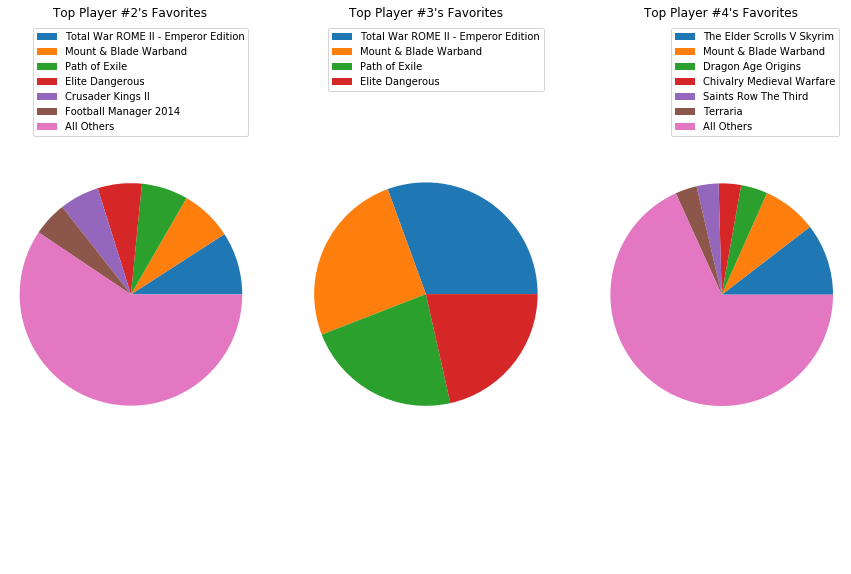

In [45]:
#Plotting our figure
plt.figure(figsize=(15,10))

plt.subplot(1, 3, 1)
plt.pie(player_2_pie)
plt.axis('equal')
plt.legend(player_2_pie.index)
plt.title('Top Player #2\'s Favorites')

plt.subplot(1, 3, 2)
plt.pie(player_3_pie)
plt.axis('equal')
plt.legend(player_3_pie.index)
plt.title('Top Player #3\'s Favorites')

plt.subplot(1, 3, 3)
plt.pie(player_4_pie)
plt.axis('equal')
plt.legend(player_4_pie.index)
plt.title('Top Player #4\'s Favorites')

plt.show()

We can build a function to quickly categorize players by their time invested into one of the top 45 games and feed in their User ID to see how they compare to other players

In [121]:
#pro --> in top 1% for hours played for games in worth playing
#semi-pro --> in top 10% for hours played for games in worth playing
#Challenger --> in top 80% for hours played for games in worth playing
#Gamer --> in top half for hours played for games in worth playing
#Casual --> in bottom half for hours played for games in worth playing


def placement(user_id):
    top45_play_time = worth_playing.sum()
    if worth_playing[user_id].sum() >= top45_play_time.quantile(q=0.99):
        return 'Pro'
    elif worth_playing[user_id].sum() >= top45_play_time.quantile(q=0.90):
        return 'Semi-Pro'
    elif worth_playing[user_id].sum() >= top45_play_time.quantile(q=0.80):
        return 'Challenger'
    elif worth_playing[user_id].sum() >= top45_play_time.quantile(q=0.50):
        return 'Gamer'
    elif worth_playing[user_id].sum() < top45_play_time.quantile(q=0.50):
        return 'Casual'

In [122]:
placement(6717871)


'Gamer'

**Further Research:** What we have shown gives us a few insights into the games that are popular, how people play those games and which games the most dedicated of players like to play. 

If we had pricing data from other data sets it would be interesting to explore which games gave you the **most bang for your buck** meaning per dollar spent on the game, how long did the average person play? It would be interesting to see what this distribution looks like for gamers? Are the games that have the most bang for your buck the most popular games? Is there a particular genre that tends to give gamers the most bang for their buck?

If we had information about the genre of the game we could also do a more indepth exploration of the differences between the play time data we showed in our analysis. It would be interesting to see whether within a specific genre if the more popular games have similar distributions to the less popular ones. Perhaps there are genres with similar play time distributions that we have not considered. 

With pricing and genre information we could also examine and compare how the pricing of games changes within a genre? Are people buying mainly first person shooters or strategy games? Which games sell more successfully? Which are played for longer? 

We can always go deeper into the rabbit hole, but I hope this quick analysis helped you learn something about the gaming community. 

